## Unconstrained Optimization

In [25]:
## import 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Setup

Define the objective function:
$$
    f(\bm{x}) = (x_1-2)^4 + (x_1-2x_2)^2
$$
where $\bm{x} = (x_1, x_2)^{\top} \in \mathbb{R}$. The gradient is 
$$
    \nabla f(\bm{x}) = \left[\begin{array}{c}
        4(x_1 -2)^3 + 2(x_1 - 2x_2) \\
        -4(x_1 - 2x_2)
    \end{array} \right],
$$
and the Hessian is
$$
    \nabla^2 f(\bm{x}) = \left[\begin{array}{cc}
        12(x_1 -2)^2 + 2 & -4 \\
        -4 & 8
    \end{array} \right].
$$

In [26]:
# defintion of objective function
class my_object:
    def __init__(self):
        self.attribute = None
    def objective_func(self, x):
        x_1 = x[0]
        x_2 = x[1]
        y = (x_1 - 2)**4 + (x_1 - 2*x_2)**2
        return(y)
    def objective_grad(self, x):
        x_1 = x[0]
        x_2 = x[1]
        grad_x1 = 4*(x_1-2)**3 + 2*(x_1 - 2*x_2)
        grad_x2 = -4*(x_1-2*x_2)
        grad = np.array([grad_x1, grad_x2])
        return(grad)
    def objective_hess(self, x):
        x_1 = x[0]
        hes_11 = 12*(x_1 -2)**2 + 2
        hes_12 = -4
        hes_22 = 8
        hessian = np.array([hes_11, hes_12, hes_12, hes_22]).reshape(2, 2)
        return(hessian)

In [27]:
# instance
my_obj = my_object()

# set initial value
x_init = np.array([0, 3])

# value and gradient at initial value
print(my_obj.objective_func(x_init))
print( -my_obj.objective_grad(x_init))

52
[ 44 -24]


In [28]:
def g(x, d, alpha):
    g_value = my_obj.objective_func( (x + alpha*d) )
    return g_value

print(g((x_init), -my_obj.objective_grad(x_init), alpha=0))

52


In [29]:
from sys import float_info
print(float_info.epsilon)

2.220446049250313e-16


### Implementation of Steepest Descent Method

In [45]:
# set initial value
outer_counter = 0
inner_counter = 0
# my_epsilon = float_info.epsilon
my_epsilon = 0.001#0.00001
x = x_init
beta = 0.99
alpha_init = 0.1

# configuration for iteration
display_grid = 50

# to save path
x_path_sd = np.array([x])
f_path_sd = np.array([my_obj.objective_func(x)])

# steepest decent method
while (np.linalg.norm(my_obj.objective_grad(x)) > my_epsilon):
    # report the iteration
    if ( (outer_counter+1)%display_grid == 0):
        print("------iter: {}".format(outer_counter+1), "--------")
        print("x: {}".format(x) )
        print("value: {}".format(my_obj.objective_func(x)))
        print("grad: {}".format(my_obj.objective_grad(x)))
    
    # update step direction
    d = -  my_obj.objective_grad(x)
    
    # reset initial alpha
    alpha = alpha_init
    # backtraking for line search based on Armijo rule
    while (g(x, d, alpha) > g(x, d, 0) + beta*np.dot(my_obj.objective_grad(x + 0*d),d)*alpha):
        #print("--inner iter: {}".format(inner_counter+1), "--")
        #if ( (inner_counter+1)%100 == 0):
        #    print("--inner iter: {}".format(inner_counter+1), "--")
        #    print("alpha: {}".format(alpha))
        alpha = beta*alpha
        inner_counter = inner_counter + 1
    if ( (outer_counter+1)%display_grid == 0):
        print("alpha: {}".format(alpha))
    # update x
    x = x + alpha*d
    outer_counter = outer_counter + 1
    x_path_sd = np.append(x_path_sd, x)
    f_path_sd = np.append(f_path_sd, my_obj.objective_func(x))

# report the results
print("------result--------")
print("# of outer iteration: {}".format(outer_counter))
print("# of inner iteration: {}".format(inner_counter))
print("optimizer: {}".format(x))
print("optimum value: {}".format(my_obj.objective_func(x)))

------iter: 50 --------
x: [0.91986887 2.24772142]
value: 14.145879027616447
grad: [-12.19183162  14.30229586]
alpha: 0.0013013798143971594
------iter: 100 --------
x: [1.46799013 1.47105432]
value: 2.253133903210537
grad: [-3.55054561  5.89647403]
alpha: 0.0018315022217166787
------iter: 150 --------
x: [1.67556051 1.11251907]
value: 0.31300554398076785
grad: [-1.23555855  2.19791053]
alpha: 0.001945343428517255
------iter: 200 --------
x: [1.752512   0.97617011]
value: 0.04368291534675688
grad: [-0.46029129  0.79931286]
alpha: 0.0019649933621386415
------iter: 250 --------
x: [1.78217736 0.92654938]
value: 0.0072810331220494245
grad: [-0.18318264  0.28368556]
alpha: 0.001984841779938022
------iter: 300 --------
x: [1.79472025 0.90901328]
value: 0.0023189443917405426
grad: [-0.08121438  0.09322522]
alpha: 0.0020662606957299588
------iter: 350 --------
x: [1.80148805 0.90316933]
value: 0.0015764397341104014
grad: [-0.04099228  0.01940248]
alpha: 0.0030272460413199812
------iter: 400 --

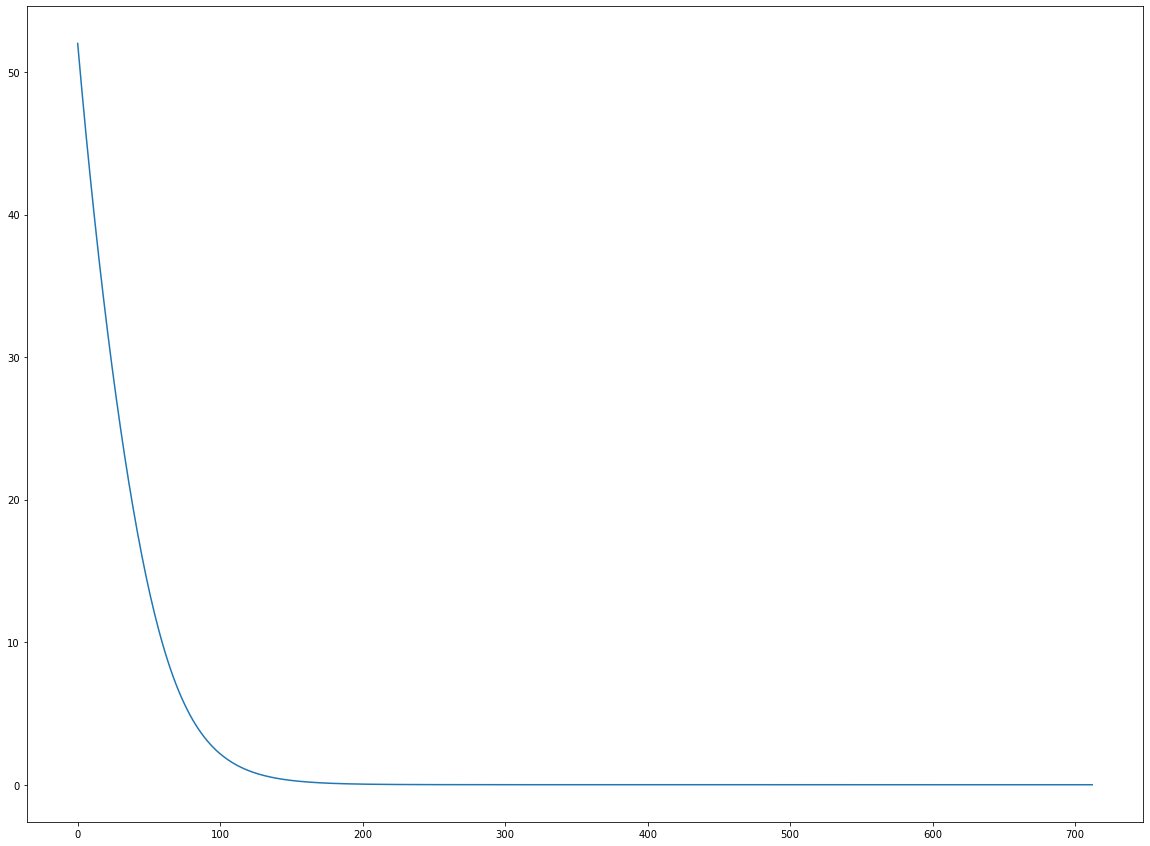

In [46]:
iteration = range((outer_counter + 1))
f_val = f_path_sd

plt.figure(figsize=(20, 15))
plt.plot(iteration, f_val, '-')

plt.show()

### Implementation of Newton Method

In [47]:
# set initial value
counter = 0
#my_epsilon = 0.01
x = x_init

# configuration for iteration
display_grid = 5

# to save path
x_path_nw = np.array([x])
f_path_nw = np.array([my_obj.objective_func(x)])

# steepest decent method
while (np.linalg.norm(my_obj.objective_grad(x)) > my_epsilon):
    # report the iteration
    if ( (outer_counter+1)%display_grid == 0):
        print("------iter: {}".format(outer_counter+1), "--------")
        print("x: {}".format(x) )
        print("value: {}".format(my_obj.objective_func(x)))
        print("grad: {}".format(my_obj.objective_grad(x)))
    
    # update step direction
    d = -  np.matmul(np.linalg.inv(my_obj.objective_hess(x)), my_obj.objective_grad(x))
    
    x = x + d
    counter = counter + 1
    x_path_nw = np.append(x_path_nw, x)
    f_path_nw = np.append(f_path_nw, my_obj.objective_func(x))

# report the results
print("------result--------")
print("# of iteration: {}".format(counter))
print("optimizer: {}".format(x))
print("optimum value: {}".format(my_obj.objective_func(x)))

------result--------
# of iteration: 9
optimizer: [1.94797541 0.97398771]
optimum value: 7.325455873891569e-06


### Comparison of Steepest Descent Method and Newton Method

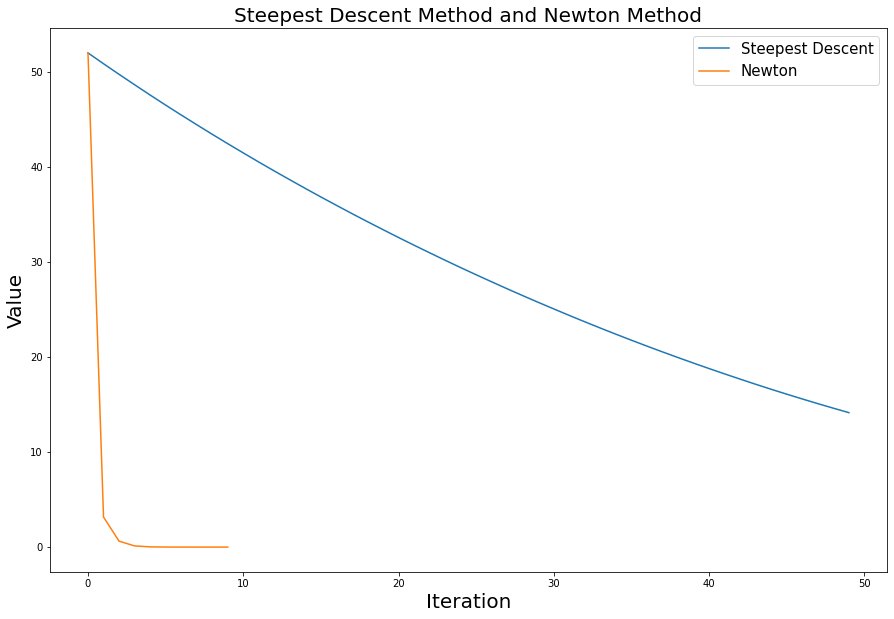

In [59]:
plt.figure(figsize=(15, 10))

iteration = range((outer_counter + 1))
f_val = f_path_sd
plt.plot(iteration[0:50], f_val[0:50], '-', label='Steepest Descent')

iteration = range((counter + 1))
f_val = f_path_nw
plt.plot(iteration, f_val, '-', label='Newton')

#plt.grid()
plt.xlabel('Iteration', fontsize=20)
plt.ylabel('Value', fontsize=20)
plt.title("Steepest Descent Method and Newton Method", fontsize=20)
plt.legend(fontsize=15)
plt.show()